# Distribution des naissances dans le temps
Dans ce carnet est proposée une analyse de la dstribution dans le temps des années de naissance des militant.es pour le droit des femmes, les droits humains, LGBTQIA+ et le climat. Le but est de mette en évidence la proportion de militant.es par générations.
De plus, la proportion des genres dans l'implciation militante sera aussi mise en lumière.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from fanalysis.ca import CA 
from fanalysis.mca import MCA
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data = pd.read_csv("analyse_geo_personne.csv")

In [59]:
display(data)

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817
3,http://www.wikidata.org/entity/Q255221,Táhirih,F,Asie,1817
4,http://www.wikidata.org/entity/Q43302262,Violante Atabalipa Ximenes de Bivar e Vellasco,F,Amérique du sud,1817
...,...,...,...,...,...
6140,http://www.wikidata.org/entity/Q60451813,Rukshana Kapali,LGBTQ,Asie,1999
6141,http://www.wikidata.org/entity/Q60614820,Kyra Gantois,F,Europe,1999
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999


# Premier graphique sur l'année de naissance et le nombre de personnes


In [60]:
# l'année de naissance est déjà de type int donc pas besoin de changer le type de la donnée
data["annee_naissance"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6145 entries, 0 to 6144
Series name: annee_naissance
Non-Null Count  Dtype
--------------  -----
6145 non-null   int64
dtypes: int64(1)
memory usage: 48.1 KB


In [61]:
data.dtypes

pk                 object
nom                object
gender             object
zone_geo           object
annee_naissance     int64
dtype: object

In [62]:
data["annee_naissance"].count()

6145

In [63]:
annee_eff= pd.DataFrame(data[data['annee_naissance'] < 2001].groupby('annee_naissance').size())\
                .reset_index(drop=False)
annee_eff.columns=['year','effectif']
annee_eff

,year,effectif
0,1816,1
1,1817,4
2,1818,5
3,1819,5
4,1820,4
...,...,...
179,1995,33
180,1996,25
181,1997,20
182,1998,22


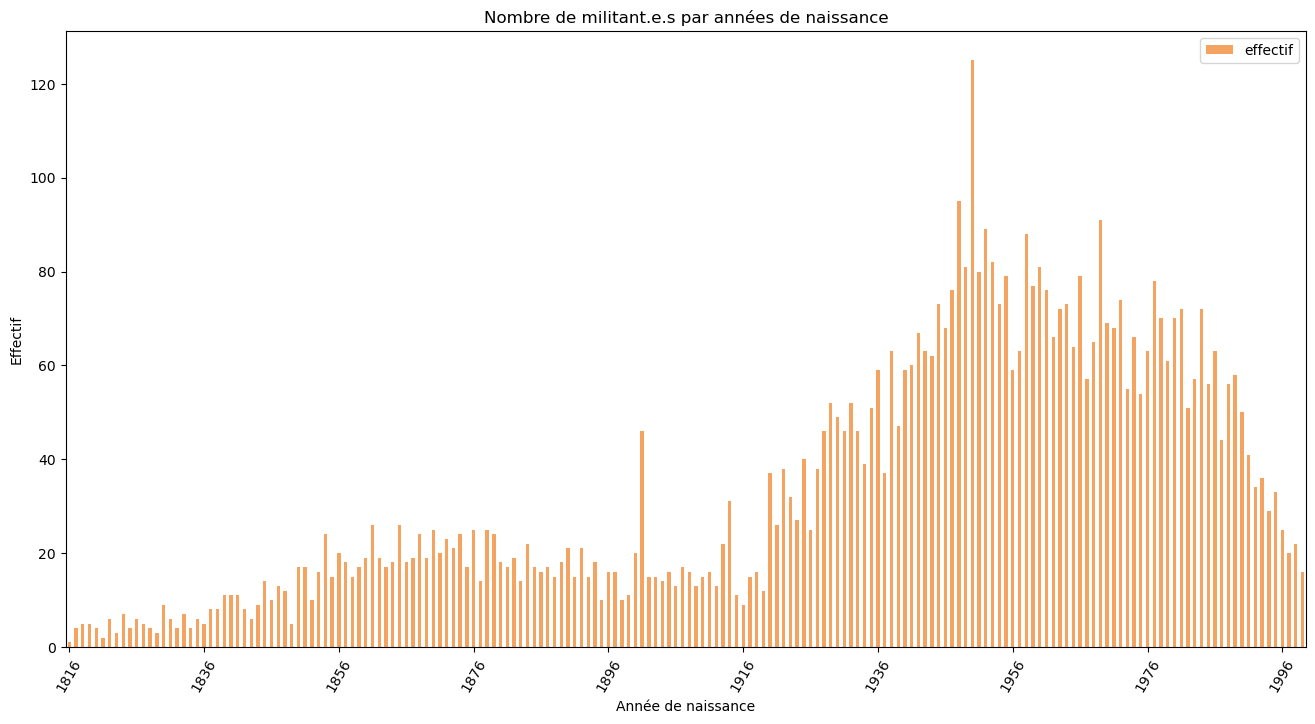

In [64]:
# Premier graphique
graph1 = annee_eff.plot(x="year", y="effectif", kind= "bar",rot=60, fontsize=10, figsize=(16,8),color=['sandybrown'])


max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
graph1.xaxis.set_major_locator(xloc)

plt.ylabel('Effectif')
plt.xlabel('Année de naissance')
plt.title("Nombre de militant.e.s par années de naissance")
plt.show()

## Code pour faire un graphique par génération

In [65]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
cdf_p = data[data['annee_naissance'] < 2001].copy(deep=True)

In [66]:
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817


In [67]:
### Année minimale et maximale dans la population
min(cdf_p['annee_naissance']), max(cdf_p['annee_naissance'])

(1816, 1999)

In [68]:
### Créer une liste d'années pour séparer en périodes de 25 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_25 = list(range(1816, 2017, 25))
l_25[:5],l_25[-5:]

([1816, 1841, 1866, 1891, 1916], [1916, 1941, 1966, 1991, 2016])

In [69]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

cdf_p['periodes'] = pd.cut(cdf_p['annee_naissance'], l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['periodes'] = cdf_p['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840


In [70]:
cdf_p[cdf_p.annee_naissance == 1999][:3]

,pk,nom,gender,zone_geo,annee_naissance,periodes
6129,http://www.wikidata.org/entity/Q105622678,Samantha Hudson,LGBTQ,Europe,1999,1991-2015
6130,http://www.wikidata.org/entity/Q107037238,Zhiar Ali,M,Europe,1999,1991-2015
6131,http://www.wikidata.org/entity/Q108871752,Benja Apan,F,Asie,1999,1991-2015


In [71]:
### compter les naissances par périodes de 25 ans
cdf_p.groupby(by='periodes').size()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/3799892700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdf_p.groupby(by='periodes').size()


periodes
1816-1840     138
1841-1865     382
1866-1890     492
1891-1915     425
1916-1940     961
1941-1965    1892
1966-1990    1599
1991-2015     256
dtype: int64

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/4144223239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = cdf_p.groupby(by='periodes').size().plot(kind='bar',rot=60, fontsize=8, figsize=(16,8),color=['salmon']


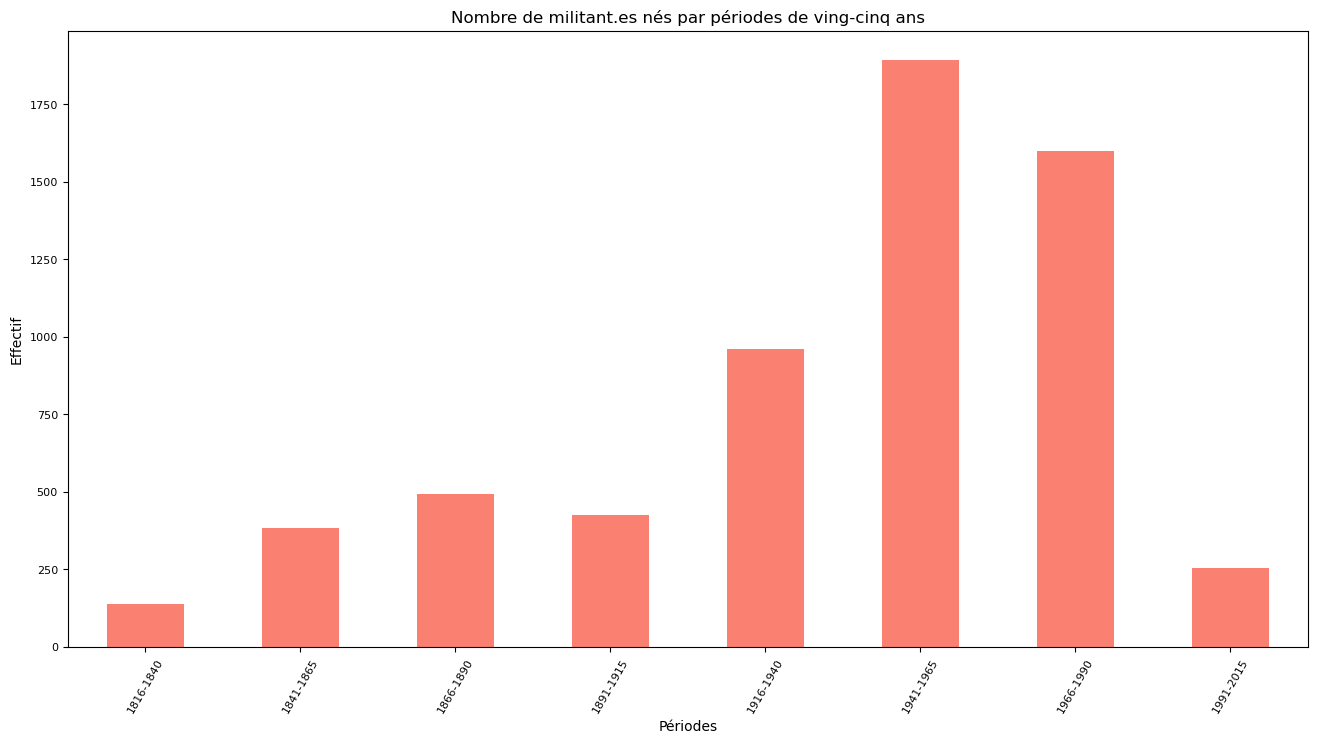

In [72]:
ax = cdf_p.groupby(by='periodes').size().plot(kind='bar',rot=60, fontsize=8, figsize=(16,8),color=['salmon']
)
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Nombre de militant.es nés par périodes de ving-cinq ans')
plt.show()

## Représentation par genre

In [73]:
### Regrouper et compter avec un fitre sur le genre féminin
# Je ne sais pas pourquoi y a des générations qui disparaissent !!!!
gender_m = pd.DataFrame(cdf_p[cdf_p.gender == 'M'].groupby('periodes').size())
gender_m.columns = ['gen_m']
gender_m.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/1467448367.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_m = pd.DataFrame(cdf_p[cdf_p.gender == 'M'].groupby('periodes').size())


,gen_m
periodes,
1891-1915,89
1916-1940,374
1941-1965,804
1966-1990,582
1991-2015,63


In [74]:
### Regrouper et compter avec un fitre sur le genre masculin
gender_f = pd.DataFrame(cdf_p[cdf_p.gender == 'F'].groupby('periodes').size())
gender_f.columns = ['gen_f']
gender_f.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/3248576015.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_f = pd.DataFrame(cdf_p[cdf_p.gender == 'F'].groupby('periodes').size())


,gen_f
periodes,
1891-1915,333
1916-1940,576
1941-1965,1002
1966-1990,846
1991-2015,139


In [75]:
gender_lgbtq = pd.DataFrame(cdf_p[cdf_p.gender == 'LGBTQ'].groupby('periodes').size())
gender_lgbtq.columns = ['gen_lgbtq']
gender_lgbtq.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/2979907089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_lgbtq = pd.DataFrame(cdf_p[cdf_p.gender == 'LGBTQ'].groupby('periodes').size())


,gen_lgbtq
periodes,
1891-1915,3
1916-1940,11
1941-1965,86
1966-1990,171
1991-2015,54


In [76]:
### Fusionner les deux tableaux en utilisant l'index comme clé de jointure
merged = pd.merge(gender_f,gender_m, left_index=True, right_index=True)
merged.tail()

,gen_f,gen_m
periodes,,
1891-1915,333,89
1916-1940,576,374
1941-1965,1002,804
1966-1990,846,582
1991-2015,139,63


In [77]:
### Transformer l'index de séquence à chaîne de caractères
# ce qui est indispensable pour l'affichage dans un graphique
merged.index = merged.index.map(str)
merged.tail()

,gen_f,gen_m
periodes,,
1891-1915,333,89
1916-1940,576,374
1941-1965,1002,804
1966-1990,846,582
1991-2015,139,63


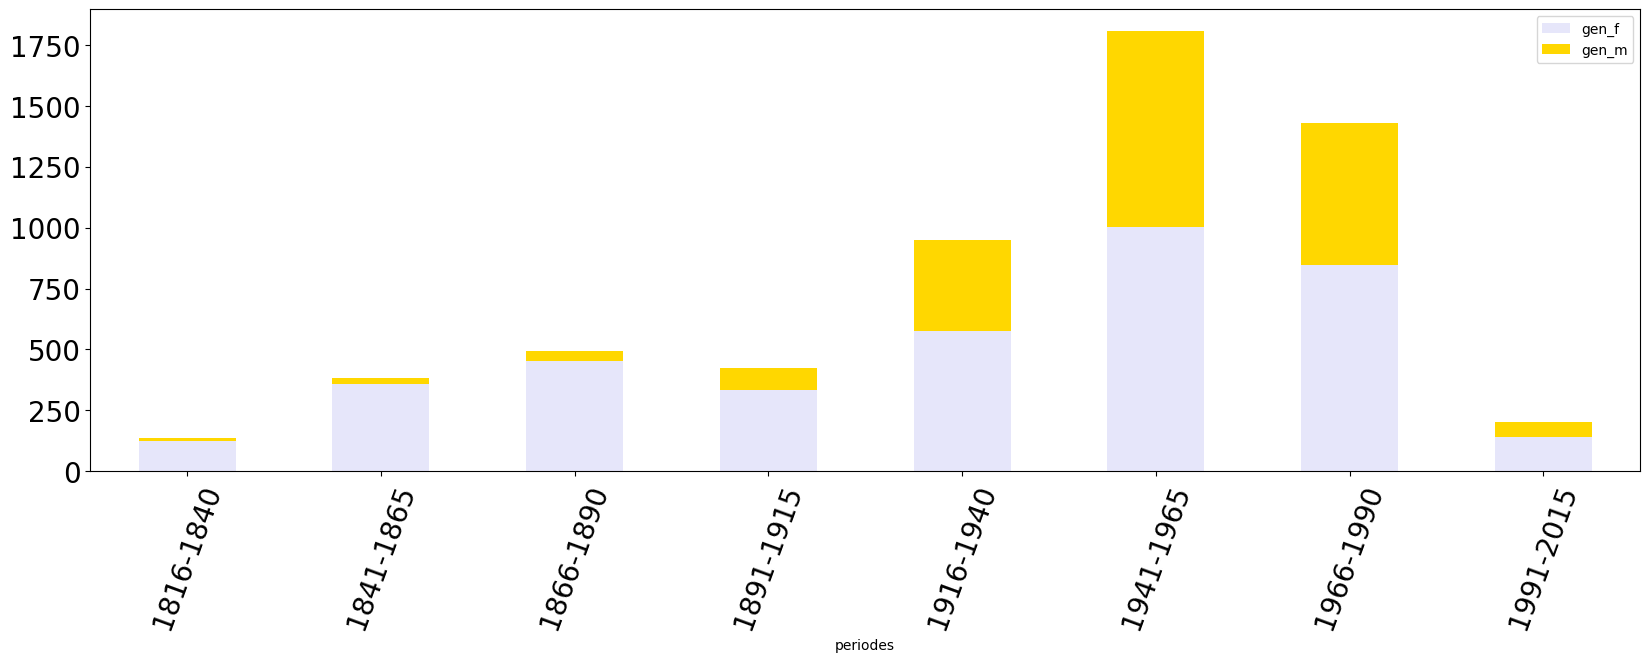

In [78]:
ax = merged.plot.bar(stacked=True, rot=70, fontsize=20, figsize=(20,6), color=['lavender', 'gold'])
plt.show()

### Commentaire
Il y a clairement une proportion plus grande de femmes dans les militant.es. Cependant lors de la seconde moitié du XXIe siècle la tendance tend à s'équilibrer.

In [79]:
l_10 = list(range(1816, 2007, 10))
l_10[:5],l_10[-5:]

([1816, 1826, 1836, 1846, 1856], [1966, 1976, 1986, 1996, 2006])

In [80]:

cdf_p['per_10'] = pd.cut(cdf_p['annee_naissance'], l_10, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['per_10'] = cdf_p['per_10'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840,1816-1825
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840,1816-1825
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840,1816-1825


In [81]:
### On regroupe par genre comme ci-dessus
## Même problème qu'avant ? des périodes disparaissent !!!!!
gender_f_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'F') & (cdf_p.annee_naissance > 1815)].groupby('per_10').size())
gender_f_10.columns = ['gen_f']
gender_f_10.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/2952852462.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_f_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'F') & (cdf_p.annee_naissance > 1815)].groupby('per_10').size())


,gen_f
per_10,
1956-1965,361
1966-1975,345
1976-1985,349
1986-1995,237
1996-2005,54


In [82]:
### Idem
gender_m_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'M')& (cdf_p.annee_naissance > 1815)].groupby('per_10').size())
gender_m_10.columns = ['gen_m']
gender_m_10.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_15228/1017774975.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_m_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'M')& (cdf_p.annee_naissance > 1815)].groupby('per_10').size())


,gen_m
per_10,
1956-1965,319
1966-1975,284
1976-1985,221
1986-1995,124
1996-2005,16


In [83]:
merged_10 = pd.merge(gender_m_10, gender_f_10, left_index=True, right_index=True)
merged_10.tail()

,gen_m,gen_f
per_10,,
1956-1965,319,361
1966-1975,284,345
1976-1985,221,349
1986-1995,124,237
1996-2005,16,54


In [84]:
### On transforme le type de valeur de l'index
# et on ajoute une colonne avec le total
merged_10.index = merged_10.index.map(str)
merged_10['tot']=merged_10['gen_f']+merged_10['gen_m']
merged_10.tail()

,gen_m,gen_f,tot
per_10,,,
1956-1965,319,361,680
1966-1975,284,345,629
1976-1985,221,349,570
1986-1995,124,237,361
1996-2005,16,54,70


In [85]:
### On prépare les valeurs pour l'affichage des fréquences (proportion par rapport au total)

# liste qui contient toutes les valeurs à la suite
m_m = merged_10.gen_f.to_list()+merged_10.gen_m.to_list()

# liste d'égale longueur que la précédente qui contient 
# les valeurs de l'index, i.e. les périodes
tot = merged_10.tot.to_list()*2

# liste qui contient les valeurs des fréquences
lp = [round(v/t, 2) for v,t in zip(m_m, tot)]
lp[:3]

[0.85, 0.96, 0.91]

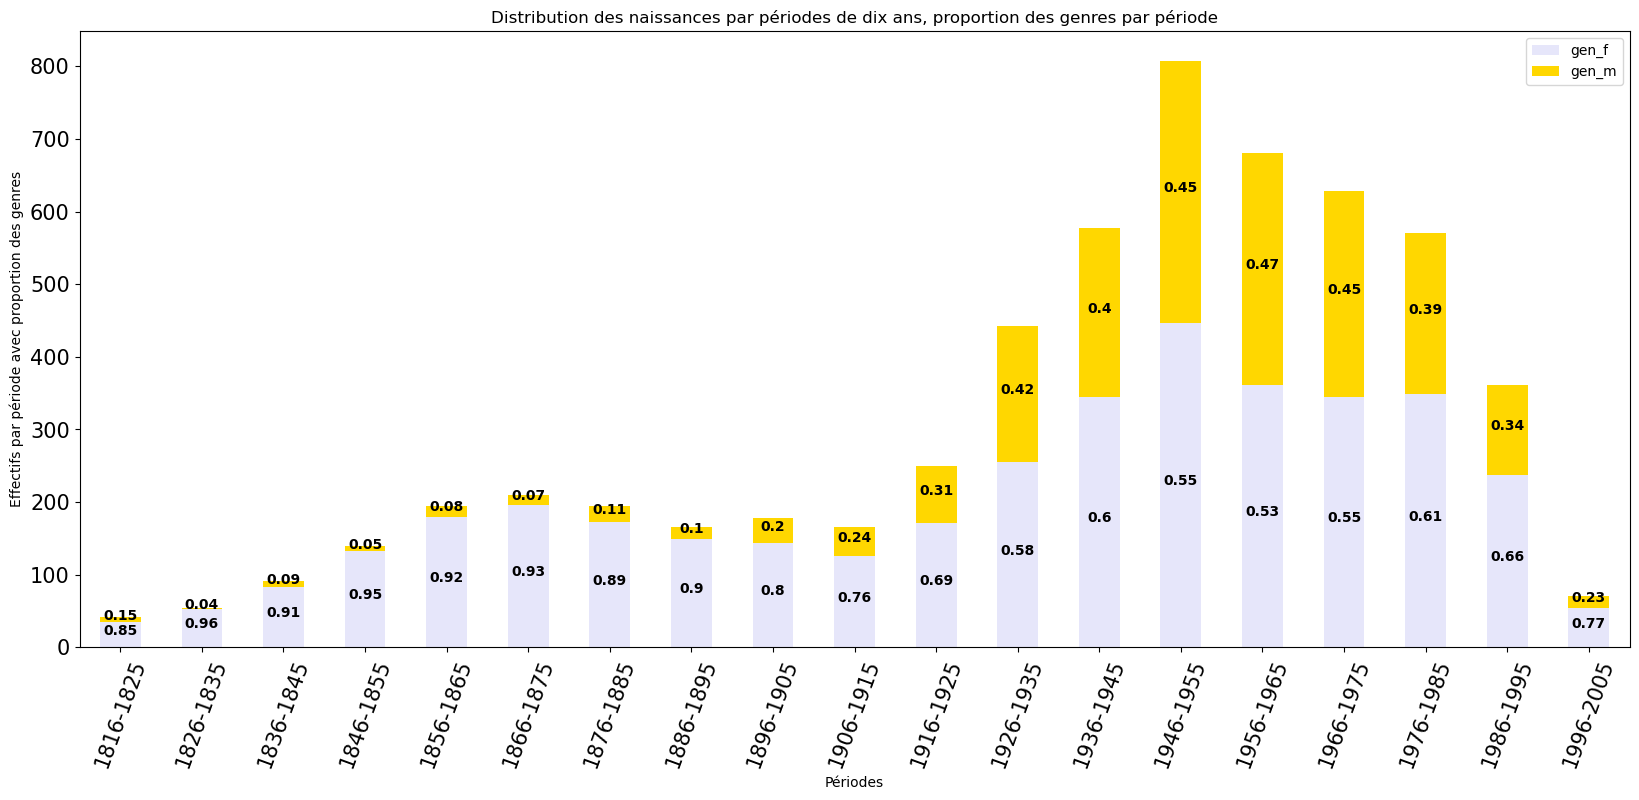

In [88]:
### Graphique avec la distribution par période et genre (M,F)
# Noter que les effectifs du genre 'Autres' étant très faibles,
# on ne les analyse pas de manière sérielle mais on peut les analyser qualitatiement

ax = merged_10.plot.bar(stacked=True, y=['gen_f', 'gen_m'], \
                        rot=70, fontsize=15, figsize=(20,8), color=['lavender', 'gold'])


### https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/


## On ajoute une étiquette concernant la valeur de fréquence
# à chaque rectangle dans le graphe, en utilisant la list 'lp' préparée précédemment
# Il y a autant de triangles que les valeurs d'index x le nombre de variables

for bar,v in zip(ax.patches,lp): 

    ax.text(
      # Met les étiquette aux centre des rectangles
      bar.get_x() + bar.get_width() / 2,
        
      # Ajoute les coordonnées verticales
      bar.get_height()/2 + bar.get_y(), 
      
      # Ajoute les valeurs
      v,

      # centre et met du style aux étiquettes
      ha='center',
      color='black',
      weight='bold',
      size=10
  )

plt.ylabel('Effectifs par période avec proportion des genres')
plt.xlabel('Périodes')
plt.title('Distribution des naissances par périodes de dix ans, proportion des genres par période')


plt.show()